In [1]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, Y = make_regression(n_samples=100, n_features=10)

In [4]:
X.shape

(100, 10)

In [5]:
Y.shape

(100,)

In [6]:
Y

array([ -17.4198452 ,   -2.61914841,  -36.73251319,  136.19824935,
        -53.81013809, -114.09018086, -182.20290045,  -80.55652755,
       -132.97623185,   13.78818184,  366.2315496 ,  -12.50262524,
        -31.53893715, -129.71004935,  -27.33610958,  136.54726968,
         98.80915084,  -13.36220739,  131.60689488,  176.13326831,
       -256.09013383,   10.03542157,  247.41878288,  -78.8794912 ,
       -165.58373346, -196.53603673,  -39.67876241,  -70.09531637,
       -160.89162048,  142.48993543,  -34.50544827,  110.87700561,
         32.19817762,   45.75334463,  131.95983503,  -39.68663694,
         43.32250686,   70.65732418,  -50.54193437,   33.20053121,
        -34.99920118,  141.32556632,   25.56933116,   39.47966032,
         80.31114575,   38.51580935,   93.51409117,  -29.50233486,
       -352.81797496,  -76.82979479,  -19.88866828,   50.68710081,
         81.09933682,  -31.55356031,   59.30248849,  -23.44365863,
        -69.87895958,  -95.34836838,  155.35528885,  -31.96481

In [7]:
df_features = pd.DataFrame(X, columns=['f1', 'f2',
                                      'f3', 'f4',
                                      'f5', 'f6',
                                      'f7', 'f8',
                                      'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=['target'])

In [8]:
reg_def = pd.concat([df_features, df_target], axis=1)

In [9]:
reg_def.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,0.479878,1.364736,0.269031,-0.596353,1.713576,-0.866728,1.215975,0.741775,-0.158982,-0.868849,-17.419845
1,0.238913,-1.539906,-0.896508,-0.688358,0.284880,-1.639458,0.452620,0.153499,1.569287,-0.161871,-2.619148
2,-1.004621,0.993873,-0.672225,-0.977150,0.364151,-0.199071,-0.189781,0.362232,-0.036283,0.452785,-36.732513
3,0.422020,-0.871628,-0.458126,-0.198151,-0.982126,0.897728,2.669685,-2.563619,0.362479,1.283822,136.198249
4,0.749764,-1.946775,0.833027,-0.949701,-1.083472,0.019705,-0.388418,0.116820,-0.812537,0.364299,-53.810138


In [10]:
from sklearn.datasets import make_classification

In [11]:
X, Y = make_classification(n_samples=100,
                          n_features=10,
                          n_classes=2)

In [12]:
X.shape

(100, 10)

In [13]:
Y.shape

(100,)

In [14]:
df_features = pd.DataFrame(X, columns=['f1', 'f2',
                                      'f3', 'f4',
                                      'f5', 'f6',
                                      'f7', 'f8',
                                      'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=['labels'])

In [15]:
clf_df = pd.concat([df_features, df_target], axis=1)

In [16]:
clf_df.sample(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,labels
58,-1.670552,0.338887,-1.069309,-0.782315,1.367102,-0.693651,0.540815,-0.942823,-0.209274,1.046608,0
69,-0.513954,0.557768,0.299587,0.747472,-0.011688,0.688651,0.158657,-1.047640,-0.805891,0.020444,1
88,0.195119,-0.091937,1.112182,1.643468,-0.838664,-1.340498,-0.834571,1.669029,0.978028,-1.291715,1
48,-0.375545,-1.578273,-0.638343,-0.801489,0.581017,-0.391313,-0.477149,-1.073552,-0.490237,0.064423,0
59,2.861405,-0.615247,0.453506,-0.826431,-1.393907,0.824556,0.693126,0.606008,0.178695,-0.628704,0


In [18]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

In [25]:
def variance_plt(n_samples=100,
                n_features=10,
                effective_rank=2,
                tail_strength=0.5):
    
    X = make_low_rank_matrix(n_samples=n_samples,
                            n_features=n_features,
                            effective_rank=effective_rank,
                            tail_strength=tail_strength)
    
    pca = PCA(n_components=n_features)
    X_reduced = pca.fit_transform(X)
    
    cum_variance = np.cumsum(pca.explained_variance_ratio_)
    print('Cumulative Variance:\n', cum_variance)
    
    plt.figure(figsize=(12, 8))
    plt.plot(cum_variance)
    plt.xlabel('n components')
    plt.ylabel('cumulative variance')
    
    return {'matrix' : X, 'pca_model' : pca}

Cumulative Variance:
 [0.53293548 0.86933115 0.96403715 0.98146936 0.98662735 0.98996468
 0.9928659  0.99544737 0.99783237 1.        ]


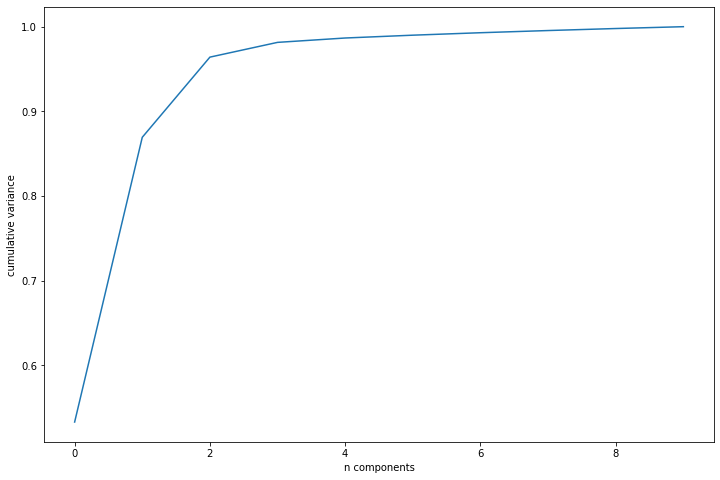

In [26]:
plot = variance_plt(tail_strength=0.1)

plt.show()

Cumulative Variance:
 [0.47792581 0.79531101 0.90457898 0.93595934 0.95138128 0.96345186
 0.97418043 0.98348638 0.99217315 1.        ]


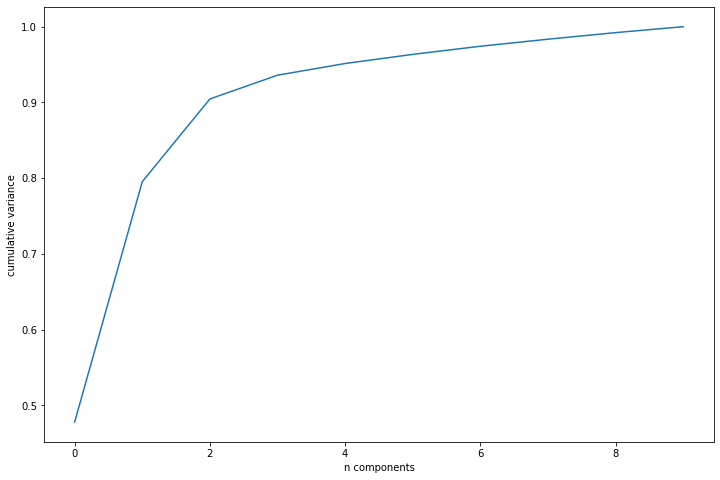

In [27]:
plot_1 = variance_plt(tail_strength=0.2)

plt.show()

Cumulative Variance:
 [0.42215018 0.71334499 0.83102246 0.87746993 0.9055341  0.92872232
 0.94953795 0.96759284 0.98459061 1.        ]


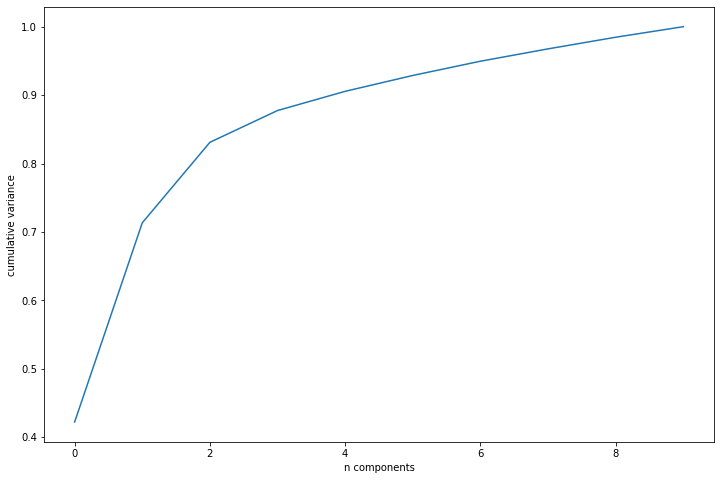

In [28]:
plot_2 = variance_plt(tail_strength=0.3)

plt.show()

In [29]:
from sklearn.datasets import make_blobs

In [30]:
X, Y = make_blobs(n_samples=200, centers=5, n_features=2)

In [31]:
X.shape, Y.shape

((200, 2), (200,))

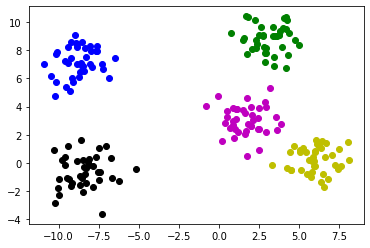

In [32]:
for i in range(len(X)):
    colors = ['k', 'b', 'g', 'y', 'm', 'c']
    plt.scatter(X[i][0], X[i][1], c=colors[Y[i]])
    
plt.show()

In [33]:
from sklearn.datasets import make_circles

In [34]:
X, color = make_circles(n_samples=200, noise=0.05, factor=0.5)

In [35]:
X.shape

(200, 2)

In [36]:
color.shape

(200,)

In [37]:
color

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

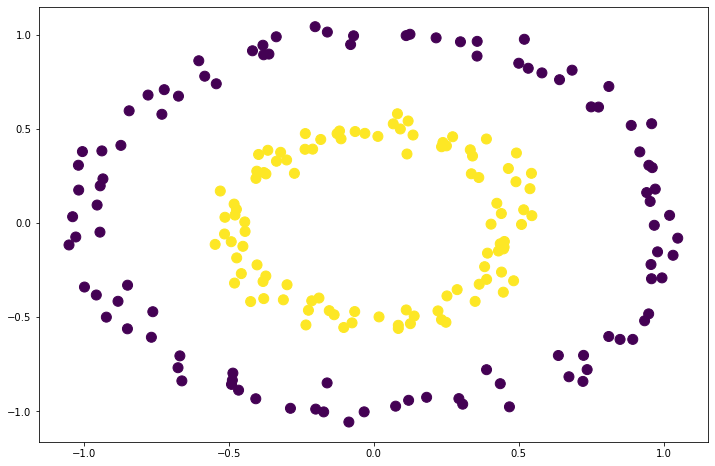

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=color, s=100)

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, color_train, color_test = \
        train_test_split(X, color, test_size=0.3)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
svc_model = DecisionTreeClassifier(max_depth=10).fit(x_train, color_train)

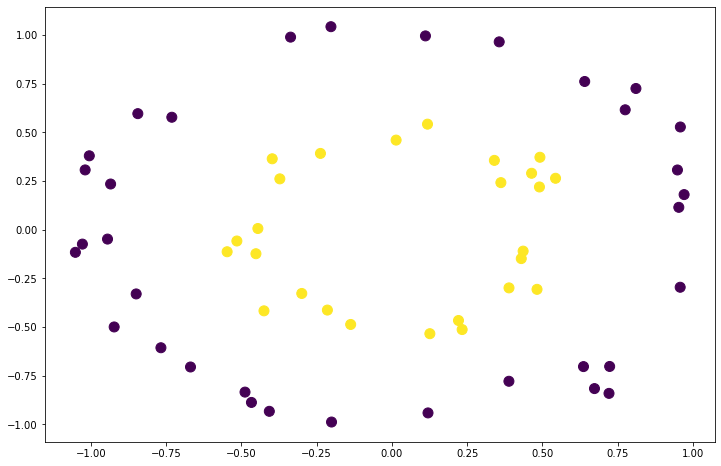

In [42]:
color_pred = svc_model.predict(x_test)

plt.figure(figsize=(12, 8))
plt.scatter(x_test[:, 0], x_test[:, 1], c=color_pred, s=100)

plt.show()

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(color_test, color_pred)

1.0

In [44]:
from sklearn.datasets import make_s_curve

In [45]:
X, color = make_s_curve(n_samples=1000)

In [46]:
X.shape

(1000, 3)

In [48]:
from mpl_toolkits.mplot3d import Axes3D

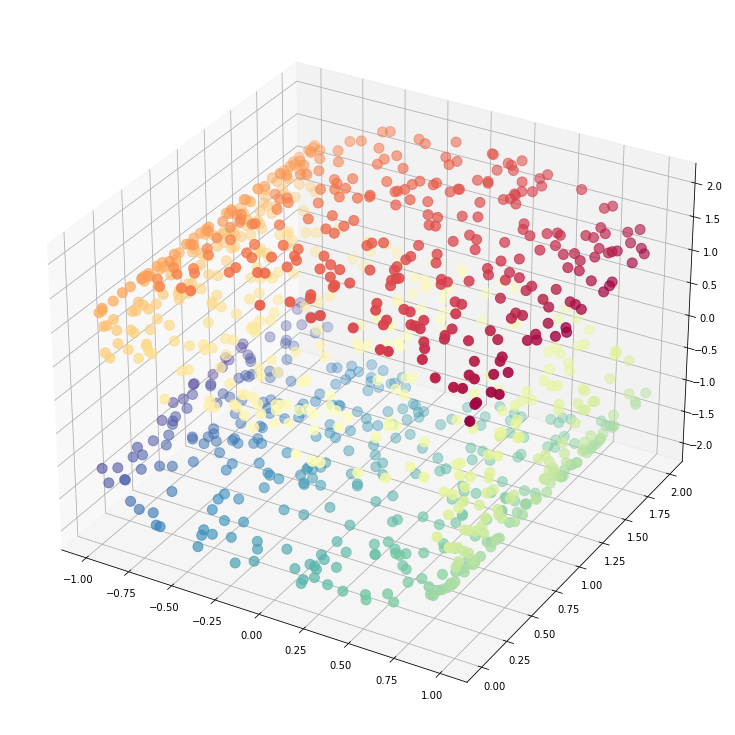

In [49]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2],
          c=color,
          cmap=plt.cm.Spectral, s=100)

plt.show()

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

In [51]:
model = LocallyLinearEmbedding(n_neighbors = 15,
                              n_components = 2,
                              method = 'hessian')

lle = model.fit_transform(X)

In [52]:
lle

array([[ 0.04130897,  0.037219  ],
       [ 0.01382575, -0.02264316],
       [-0.05285046, -0.01360459],
       ...,
       [ 0.04157749,  0.04678684],
       [-0.05417644,  0.03315093],
       [ 0.04280202,  0.03056247]])

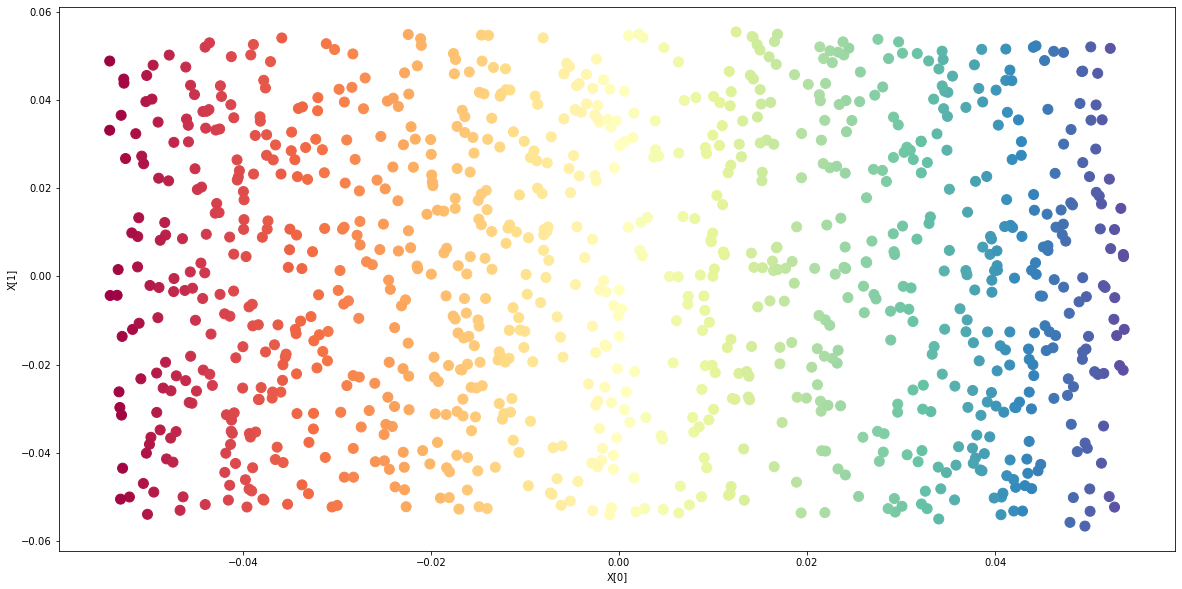

In [54]:
plt.figure(figsize=(20, 10))

plt.scatter(lle[:,0], lle[:,1],
           c = color,
           cmap = plt.cm.Spectral,
           s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

In [55]:
from sklearn.datasets import make_swiss_roll

In [56]:
X, color = make_swiss_roll(n_samples=1000)

In [57]:
X.shape

(1000, 3)

In [58]:
color.shape

(1000,)

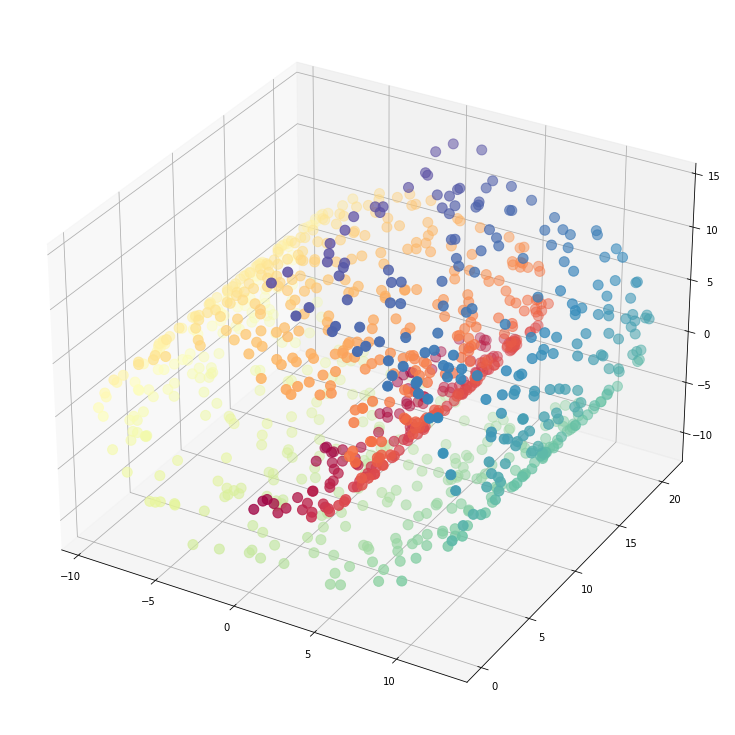

In [59]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2],
          c=color,
          cmap=plt.cm.Spectral, s=100)

plt.show()

In [60]:
from sklearn.manifold import Isomap

In [61]:
model = Isomap(n_neighbors = 10, n_components = 2)
iso = model.fit_transform(X)

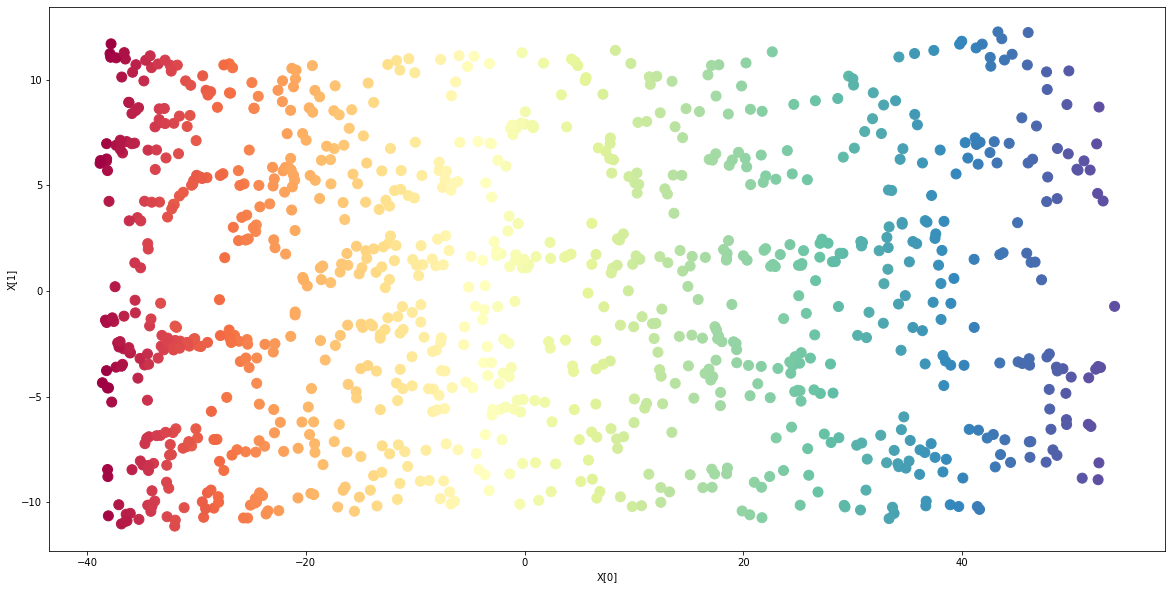

In [62]:
plt.figure(figsize=(20, 10))

plt.scatter(iso[:,0], iso[:,1], c=color, cmap=plt.cm.Spectral, s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()